# Visualise covariates

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from siuba import *

In [51]:
root_dir = Path().resolve().parents[1]
data_dir = root_dir / 'data'

In [52]:
df = pd.read_csv(data_dir / 'eurovision_merged_covariates_03Feb.csv')
# rename columns to be lowercase and _ instead of spaces
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [53]:
# combine own, english, other
# create a list of conditions and corresponding values for the new column
conditions = [
    df['own'] == 1,
    df['english'] == 1,
    df['other'] == 1
]
values = ['own', 'english', 'other']

# use numpy.select() to create the new column
df['language'] = np.select(conditions, values)


In [54]:
# set has_border NaN to 0
df['has_border'] = df['has_border'].fillna(0)

In [55]:
# keep only the columns we want
df = df[['from_country', 'country', 'code', 'year','votes', 'language', 'has_border', 'prop_emigrants', 'gender', 'comps_since_last_win']]
df.columns

Index(['from_country', 'country', 'code', 'year', 'votes', 'language',
       'has_border', 'prop_emigrants', 'gender', 'comps_since_last_win'],
      dtype='object')

In [56]:
# save to csv
df.to_csv(data_dir / 'eurov_cov_for_vis.csv', index=False)

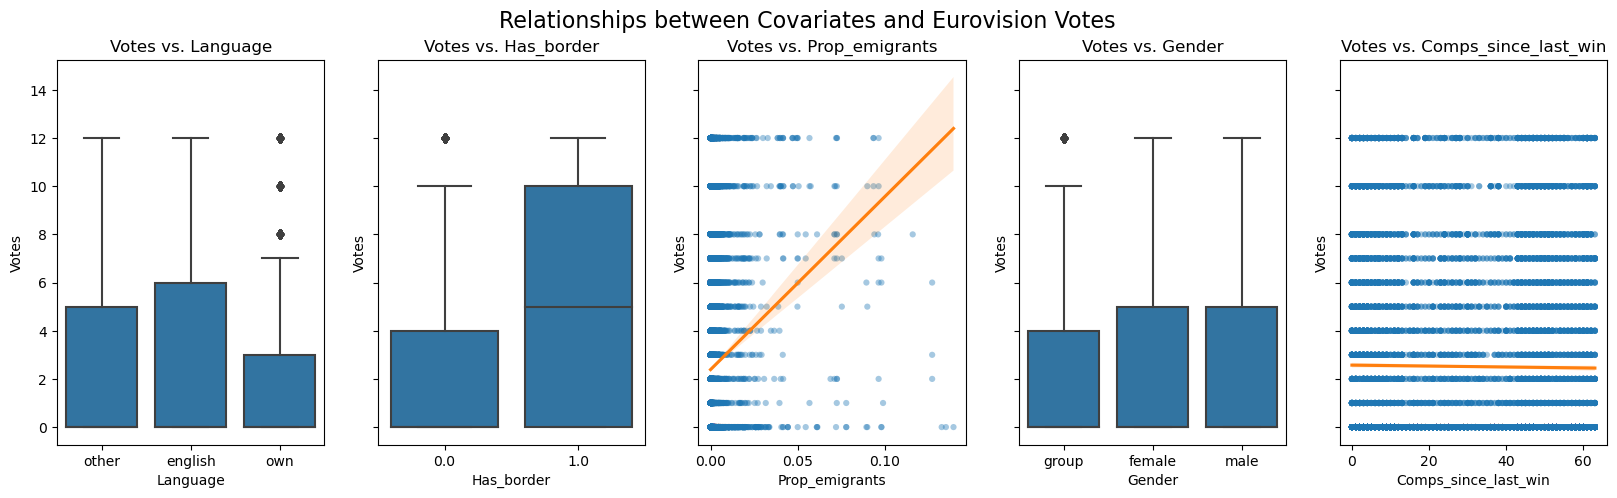

In [66]:
# Define the variables of interest and their data types
vars_of_interest = {'language': 'categorical', 'has_border': 'binary', 'prop_emigrants': 'numeric', 'gender': 'categorical', 'comps_since_last_win': 'numeric'}

# Define the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=len(vars_of_interest), figsize=(20, 5), sharey=True)

# Loop through the variables of interest and create a plot for each one
for i, var in enumerate(vars_of_interest.keys()):
    # Determine the data type of the variable
    var_type = vars_of_interest[var]

    if var == 'language':
        sns.boxplot(ax=axes[i], x=var, y='votes', data=df, color='tab:blue')
    elif var == 'has_border':
        sns.boxplot(ax=axes[i], x=var, y='votes', data=df, color='tab:blue')
    elif var == 'gender':
        sns.boxplot(ax=axes[i], x=var, y='votes', data=df, color='tab:blue')
    elif var == 'prop_emigrants':
        sns.regplot(ax=axes[i], x=var, y='votes', data=df, ci=95, color='tab:blue', scatter_kws={'alpha': 0.4, 'edgecolor': 'none', 's': 20}, line_kws={'color': 'tab:orange'})
    elif var == 'comps_since_last_win':
        sns.regplot(ax=axes[i], x=var, y='votes', data=df, ci=95, color='tab:blue', scatter_kws={'alpha': 0.4, 'edgecolor': 'none', 's': 20}, line_kws={'color': 'tab:orange'})

    # Set the axis labels and title
    axes[i].set_xlabel(var.capitalize())
    axes[i].set_ylabel('Votes')
    axes[i].set_title(f'Votes vs. {var.capitalize()}')

fig.suptitle('Relationships between Covariates and Eurovision Votes', fontsize=16)

plt.show()
